In [1]:
# requires installing nbformat

%run init.ipynb

2019-11-19 20:59:38,904 - root - INFO - Maximum size for inputs and outputs is: 42

2019-11-19 20:59:40,466 - root - INFO - Size of input vocabulary=56
2019-11-19 20:59:40,466 - root - INFO - Size of output vocabulary=1232
2019-11-19 20:59:40,467 - root - INFO - Seq2SeqDataBunch;

Train: LabelList (40689 items)
x: Seq2SeqTextList
xxbos xxmaj the xxup xxx , pub , customer rating 5 out of 5 , price range more than £ 30 , near xxup yyy,xxbos xxmaj the xxup xxx , pub , xxmaj english , price range cheap , near xxup yyy,xxbos xxmaj the xxup xxx , coffee shop , xxmaj japanese , customer rating low , price range less than £ 20 , family friendly yes , area riverside , near xxup yyy,xxbos xxmaj the xxup xxx , coffee shop , xxmaj french , price range £ 20 - 25 , area riverside , near the xxup yyy,xxbos xxup xxx , xxmaj french , customer rating high , area riverside , near the xxup yyy
y: TextList
xxbos xxmaj the xxup xxx pub near xxup yyy has a 5 star rating . xxmaj prices start at £ 30 .,xxbos x

xxunk
xxpad
xxbos
xxeos
xxfld
xxmaj
xxup
xxrep
xxwrep
xxunk
xxpad
xxbos
xxeos
xxfld
xxmaj
xxup
xxrep
xxwrep
n't
xxxs
clentele
d'oeuvres
-stars
d'oeuvre
-priced
yyyn
caféteria
2019-11-19 21:00:59,726 - root - INFO - Encoder embeddings saved to: ./enc_emb.pth
2019-11-19 21:00:59,727 - root - INFO - Encoder embeddings saved to: ./dec_emb.pth


/Users/nadjet/Work/seq2seq/seq2seq_venv/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Embedding. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [2]:
from seq2seq.seq2seq_attn import Seq2SeqRNN_attn
from fastai.text import Learner, partial
from utils.loss import Loss
from utils.bleu import CorpusBLEU
from utils.teacher_forcing import TeacherForcing
from utils.metrics import Metrics
from utils.predict import *
import random

In [3]:
HIDDEN_LAYER_SIZE = 64
MAX_SIZE = dl.max_size
emb_enc = embs.emb_enc
emb_dec = embs.emb_dec
data = dl.data
seq2seq_loss = Loss.seq2seq_loss
seq2seq_acc = Metrics.seq2seq_acc

In [7]:
rnn = Seq2SeqRNN_attn(emb_enc, emb_dec, HIDDEN_LAYER_SIZE, MAX_SIZE)

learn = Learner(data, rnn, loss_func=seq2seq_loss, metrics=[seq2seq_acc, CorpusBLEU(len(data.y.vocab.itos))],
                callback_fns=partial(TeacherForcing, end_epoch=10),silent=False)

In [8]:
learn.lr_find(end_lr=2.)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 1.29E-02
Min loss divided by 10: 5.57E-04


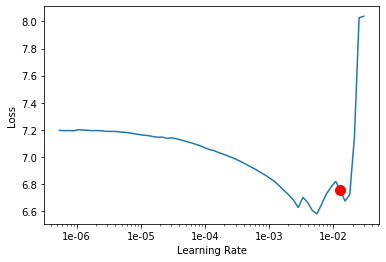

In [10]:
learn.recorder.plot(suggestion=True,skip_end=15)

In [11]:
learn.fit_one_cycle(3,  2E-03)

epoch,train_loss,valid_loss,seq2seq_acc,bleu,time
0,1.092780,6.616210,0.251346,0.358446,10:02
1,0.986076,6.169714,0.239421,0.380580,09:47
2,0.999047,5.640145,0.240640,0.382733,09:24


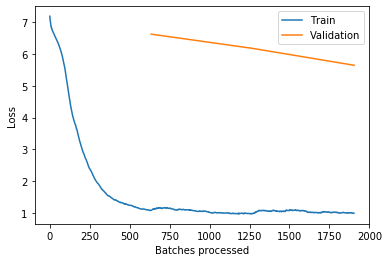

In [12]:
learn.recorder.plot_losses()

In [13]:
inputs, targets, outputs = get_predictions(learn)

In [14]:
inputs[2513], targets[2513], outputs[2513]

(Text xxbos xxup xxx , coffee shop , xxmaj english , customer rating 3 out of 5 , family friendly yes , area riverside,
 Text xxbos xxmaj there is a friendly for kids coffee shop called xxup xxx that provides xxmaj english food in the riverside area . xxmaj the customer rating is 3 out of 5 .,
 Text xxbos xxup xxx is a kid friendly xxmaj italian coffee shop in the riverside area . xxmaj it has a customer rating of 3 out of 5 .)

In [15]:
inputs[4000], targets[4000], outputs[4000]

(Text xxbos xxmaj the xxup xxx , customer rating 3 out of 5 , area riverside,
 Text xxbos xxmaj the xxup xxx along the riverside is rated 3 out of 5 .,
 Text xxbos xxmaj the xxup xxx is a restaurant in the riverside area . xxmaj it has a customer rating of 3 out of 5 .)

In [16]:
learn.save('model_attn')

## Get predictions from dataframe

In [4]:
dl0 = E2ENLGDataLoader(dataset_path,"trainset.csv","devset.csv",percentile=100)
dl0.setDataAndMaxSize()

2019-11-19 21:02:51,812 - root - INFO - Maximum size for inputs and outputs is: 95

2019-11-19 21:02:53,507 - root - INFO - Size of input vocabulary=56
2019-11-19 21:02:53,508 - root - INFO - Size of output vocabulary=1232
2019-11-19 21:02:53,509 - root - INFO - Seq2SeqDataBunch;

Train: LabelList (42061 items)
x: Seq2SeqTextList
xxbos xxmaj the xxup xxx , pub , customer rating 5 out of 5 , price range more than £ 30 , near xxup yyy,xxbos xxmaj the xxup xxx , pub , xxmaj english , price range cheap , near xxup yyy,xxbos xxmaj the xxup xxx , coffee shop , xxmaj japanese , customer rating low , price range less than £ 20 , family friendly yes , area riverside , near xxup yyy,xxbos xxmaj the xxup xxx , coffee shop , xxmaj french , price range £ 20 - 25 , area riverside , near the xxup yyy,xxbos xxup xxx , xxmaj french , customer rating high , area riverside , near the xxup yyy
y: TextList
xxbos xxmaj the xxup xxx pub near xxup yyy has a 5 star rating . xxmaj prices start at £ 30 .,xxbos x

In [5]:
dl.max_size

42

In [6]:
HIDDEN_LAYER_SIZE = 64
MAX_SIZE = dl.max_size
emb_enc = embs.emb_enc
emb_dec = embs.emb_dec
data = dl0.data
seq2seq_loss = Loss.seq2seq_loss
seq2seq_acc = Metrics.seq2seq_acc

rnn = Seq2SeqRNN_attn(emb_enc, emb_dec, HIDDEN_LAYER_SIZE, MAX_SIZE)

learn = Learner(data, rnn, loss_func=seq2seq_loss, metrics=[seq2seq_acc, CorpusBLEU(len(data.y.vocab.itos))],
                callback_fns=partial(TeacherForcing, end_epoch=10),silent=False)

In [7]:
learn = learn.load('model_attn')
learn

Learner(data=Seq2SeqDataBunch;

Train: LabelList (42061 items)
x: Seq2SeqTextList
xxbos xxmaj the xxup xxx , pub , customer rating 5 out of 5 , price range more than £ 30 , near xxup yyy,xxbos xxmaj the xxup xxx , pub , xxmaj english , price range cheap , near xxup yyy,xxbos xxmaj the xxup xxx , coffee shop , xxmaj japanese , customer rating low , price range less than £ 20 , family friendly yes , area riverside , near xxup yyy,xxbos xxmaj the xxup xxx , coffee shop , xxmaj french , price range £ 20 - 25 , area riverside , near the xxup yyy,xxbos xxup xxx , xxmaj french , customer rating high , area riverside , near the xxup yyy
y: TextList
xxbos xxmaj the xxup xxx pub near xxup yyy has a 5 star rating . xxmaj prices start at £ 30 .,xxbos xxmaj close to xxup yyy , xxmaj the xxup xxx pub serves delicious xxmaj xxunk xxmaj xxunk for the cheap price of £ 10 . 50 . xxmaj delicious xxmaj pub food .,xxbos xxmaj the xxup xxx is a low rated coffee shop near xxup yyy and the riverside that is f

In [7]:
inputs, targets, outputs = get_predictions(learn,ds_type=DatasetType.Valid)

In [13]:
inputs[10],targets[10],outputs[10]

(Text xxbos xxmaj the xxup xxx , coffee shop , xxmaj chinese , customer rating high , price range £ 20 - 25 , family friendly yes , area city centre , near xxup yyy,
 Text xxbos xxmaj if you are looking for a coffee shop , try xxmaj the xxup xxx it offers xxmaj chines food and has an average price range with a xxmaj high customer rating . xxmaj it is located near the xxup yyy in the city centre and it is kid friendly,
 Text xxbos xxmaj the xxup xxx is a xxmaj japanese coffee shop in the city centre near xxup yyy . xxmaj it is kid friendly and has a high customer rating and a price range of £ 20 - 25 .)

In [25]:
rows = []
for i in range(len(inputs)):
    row = {"input":inputs[i],"output":outputs[i],"target":targets[i]}
    rows.append(row)
df = pd.DataFrame(rows)
df.to_csv("gitignore/attn/seq2seq_attn_dev.csv",index=False,sep="\t")

## Top-p sampling

In [8]:
rxs,rys,rzs,xs,ys,zs = preds_acts(learn)

In [9]:
idx=10
rx,ry,rz = rxs[idx],rys[idx],rzs[idx]
x,y,z = xs[idx],ys[idx],zs[idx]
rx,ry,rz

(Text xxbos xxmaj the xxup xxx , coffee shop , xxmaj chinese , customer rating high , price range £ 20 - 25 , family friendly yes , area city centre , near xxup yyy,
 Text xxbos xxmaj if you are looking for a coffee shop , try xxmaj the xxup xxx it offers xxmaj chines food and has an average price range with a xxmaj high customer rating . xxmaj it is located near the xxup yyy in the city centre and it is kid friendly,
 Text xxbos xxmaj the xxup xxx is a xxmaj japanese coffee shop in the city centre near xxup yyy . xxmaj it is kid friendly and has a high customer rating and a price range of £ 20 - 25 .)

In [47]:
rx,ry,rz = predict_with_decode(learn, x, y,p=0.5)
rz

Text xxbos xxmaj the xxup xxx is a coffee shop that xxmaj chinese food . xxmaj it is located in the city centre near xxup yyy . xxmaj it is a kids friendly coffee shop and has a high customer rating .

In [48]:
rows = []
for idx in range(len(rxs)):
    rx,ry,rz = rxs[idx],rys[idx],rzs[idx]
    x,y,z = xs[idx],ys[idx],zs[idx]
    px,py,pz = predict_with_decode(learn, x, y)
    row = {"input":rx,"target":ry,"output":pz}
    rows.append(row)

In [49]:
df = pd.DataFrame(rows)
df.to_csv("gitignore/attn/top_p.csv",sep="\t",index=False)

In [50]:
df.sample(5)

,input,target,output
1591,"xxbos xxmaj the xxup xxx , coffee shop , customer rating 1 out of 5 , family friendly yes , area riverside , near xxup yyy",xxbos xxmaj the xxup xxx is a coffee shop near xxup yyy and the riverside and is kid friendly with a customer rating of 1 out of 5 .,xxbos xxmaj the xxup xxx is a family friendly coffee shop located near xxup yyy in the riverside area . xxmaj it has a customer rating of 1 out of 5 .
3678,"xxbos xxup xxx , coffee shop , xxmaj english , family friendly yes , area riverside , near xxup yyy","xxbos xxmaj near xxup yyy , xxup xxx is a child - friendly coffee shop in the riverside area .","xxbos xxmaj near xxup yyy , xxup xxx is a kid friendly xxmaj french coffee shop ."
3083,"xxbos xxmaj the xxup xxx , coffee shop , xxmaj english , price range cheap , area riverside , near the xxup yyy",xxbos xxmaj the xxup xxx is xxunk cheap xxmaj english food with a coffee shop atmosphere . xxmaj it is near xxmaj the xxup yyy around the riverside area .,"xxbos xxmaj the xxup xxx is a cheap , a coffee shop serving xxmaj french food in xxmaj it is located near xxmaj the xxup yyy in the riverside area ."
946,"xxbos xxup xxx , coffee shop , xxmaj chinese , customer rating high , price range £ 20 - 25 , family friendly yes , area city centre","xxbos xxup xxx coffee shop provides xxmaj chines food in the city centre . xxmaj it is children friendly , mid priced and has a high customer rating .",xxbos xxup xxx is a coffee shop that serves xxmaj chinese food in the £ 20 - 25 price range . xxmaj it is located in the city centre . xxmaj its customer rating is high .
1648,"xxbos xxmaj the xxup xxx , coffee shop , customer rating 5 out of 5 , family friendly yes , area riverside , near xxup yyy",xxbos xxmaj in the riverside area there is a child friendly coffee shop called xxmaj the xxup xxx . xxmaj this has a star rating of 5 out of 5 and is situated near xxup yyy .,xxbos xxmaj the xxup xxx is a coffee shop near xxup yyy . xxmaj it is located in the riverside area and is kid friendly . xxmaj its customer rating is 5 out of 5 .


## Prepare for evaluation against e2e NLG baseline

In [7]:
import pandas as pd
pd.set_option('display.max_colwidth', 1000)

In [8]:
import os
from pathlib import Path
cwd = os.getcwd()
print("Working directory before change:",cwd)
path = Path(cwd)
path = path.parent
os.chdir(path)
print("Working directory after change:", os.getcwd())

Working directory before change: /Users/nadjet/Work/seq2seq
Working directory after change: /Users/nadjet/Work


In [4]:
df = pd.read_csv("gitignore/attn/seq2seq_attn_dev.csv",sep="\t")
df.sample(5)

,input,output,target
4510,"xxbos xxmaj the xxup xxx , customer rating low , family friendly yes",xxbos xxmaj the xxup xxx is a family friendly restaurant with a low customer rating .,xxbos xxmaj the xxup xxx is a family friendly place with a low rating .
2795,"xxbos xxup xxx , coffee shop , xxmaj english , customer rating 3 out of 5 , family friendly yes , area riverside",xxbos xxup xxx is a kid friendly xxmaj italian coffee shop in the riverside area . xxmaj it has a customer rating of 3 out of 5 .,xxbos xxup xxx is a coffee shop that provides xxmaj english food in the riverside area . xxmaj it is friendly for kids and the customer rating is 3 out of 5 .
4476,"xxbos xxmaj the xxup xxx , customer rating high , family friendly yes",xxbos xxmaj the xxup xxx is a child friendly restaurant with a high customer rating .,xxbos xxmaj highly rated xxmaj the xxup xxx is kid friendly .
3917,"xxbos xxmaj the xxup xxx , customer rating high , family friendly yes , near the xxup yyy",xxbos xxmaj the xxup xxx is a child friendly restaurant near xxmaj the xxup yyy . xxmaj it has a high customer rating .,"xxbos xxmaj by xxmaj the xxup yyy , there 's a high rated and kid friendly place called xxmaj the xxup xxx ."
2865,"xxbos xxmaj the xxup xxx , coffee shop , customer rating average , family friendly no , area riverside , near xxup yyy",xxbos xxmaj the xxup xxx is a coffee shop near xxup yyy in the riverside area . xxmaj it is not family - friendly and has an average customer rating .,xxbos xxmaj there is a no family - friendly coffee shop xxmaj the xxup xxx located near xxup yyy in the riverside . xxmaj its customer rating is average .


In [52]:
from e2e_nlg.evaluation.pipeline import DataFormattingPipeline

In [53]:
#pipeline = DataFormattingPipeline(output_file="gitignore/attn/seq2seq_attn_dev.csv",ref_file="gitignore/devset.csv",output_folder="gitignore/attn")
pipeline = DataFormattingPipeline(output_file="gitignore/attn/top_p.csv",ref_file="gitignore/devset.csv",output_folder="gitignore/attn")
pipeline.prepare_data()

2019-11-19 21:30:20,338 - root - INFO - Formatting the MRs in the output...
2019-11-19 21:30:21,544 - root - INFO - ...Formatting the MRs in the output done! Written to: gitignore/attn/formatted_output.csv
2019-11-19 21:30:21,545 - root - INFO - Relexicalizing output MRs and texts...
2019-11-19 21:30:46,971 - root - INFO - Wrote relexicalized data to gitignore/attn/lexicalized_output.csv
2019-11-19 21:30:46,972 - root - INFO - ...Relexicalizing output MRs and texts done! Written to: gitignore/attn/lexicalized_output.csv
2019-11-19 21:30:46,972 - root - INFO - Splitting reference into MRs and output files...
2019-11-19 21:30:47,712 - root - INFO - Saved grouped references to gitignore/attn/ref_e2e_nlg.txt
2019-11-19 21:30:47,717 - root - INFO - Saved grouped references to gitignore/attn/mr_e2e_nlg.txt
2019-11-19 21:30:47,719 - root - INFO - ...Splitting reference into MRs and output files done!
2019-11-19 21:30:47,719 - root - INFO - Writing output in same order as MRs...
2019-11-19 21:

## Use top-p sampling

In [9]:
rxs,rys,rzs,xs,ys,zs = preds_acts(learn)

In [12]:
idx=10
rx,ry,rz = rxs[idx],rys[idx],rzs[idx]
x,y,z = xs[idx],ys[idx],zs[idx]
rx,ry,rz

(Text xxbos xxmaj the xxup xxx , coffee shop , xxmaj chinese , customer rating high , price range £ 20 - 25 , family friendly yes , area city centre , near xxup yyy,
 Text xxbos xxmaj if you are looking for a coffee shop , try xxmaj the xxup xxx it offers xxmaj chines food and has an average price range with a xxmaj high customer rating . xxmaj it is located near the xxup yyy in the city centre and it is kid friendly,
 Text xxbos xxmaj the xxup xxx is a xxmaj japanese coffee shop in the city centre near xxup yyy . xxmaj it is kid friendly and has a high customer rating and a price range of £ 20 - 25 .)

In [13]:
rx,ry,rz = predict_with_decode(learn, x, y)
rz

TypeError: decoder() missing 2 required positional arguments: 'enc_att' and 'enc_out'